# Tugas Statistika Probabilitas

### Import Datasets and Library needed

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_csv('data/datasets.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tanggal            121 non-null    int64  
 1   Curah Hujan (mm)   121 non-null    float64
 2   Penjualan A (pcs)  121 non-null    int64  
 3   Penjualan B (pcs)  121 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.9 KB


### 1. Modus, Median, Mean Untuk Setiap Columns

In [24]:
## Deklarasi variabel
results = {}

## loop untuk mencari mean, median, modus

for column in data.columns:
    if column != 'Tanggal':
        mean = data[column].mean()
        median = data[column].median()
        mode = data[column].mode()[0]
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)

        results[column] = {
            'mean': mean,
            'median': median,
            'mode': mode,
            'Q1' : q1,
            'Q3' : q3
        }

# print hasil
df_results = pd.DataFrame(results)
df_transpose_results = df_results.T
df_transpose_results

,mean,median,mode,Q1,Q3
Curah Hujan (mm),14.259504,2.1,0.0,0.0,16.4
Penjualan A (pcs),131.834711,52.0,0.0,5.0,238.0
Penjualan B (pcs),201.165289,186.0,0.0,76.0,302.0


#### Visualisasi Data

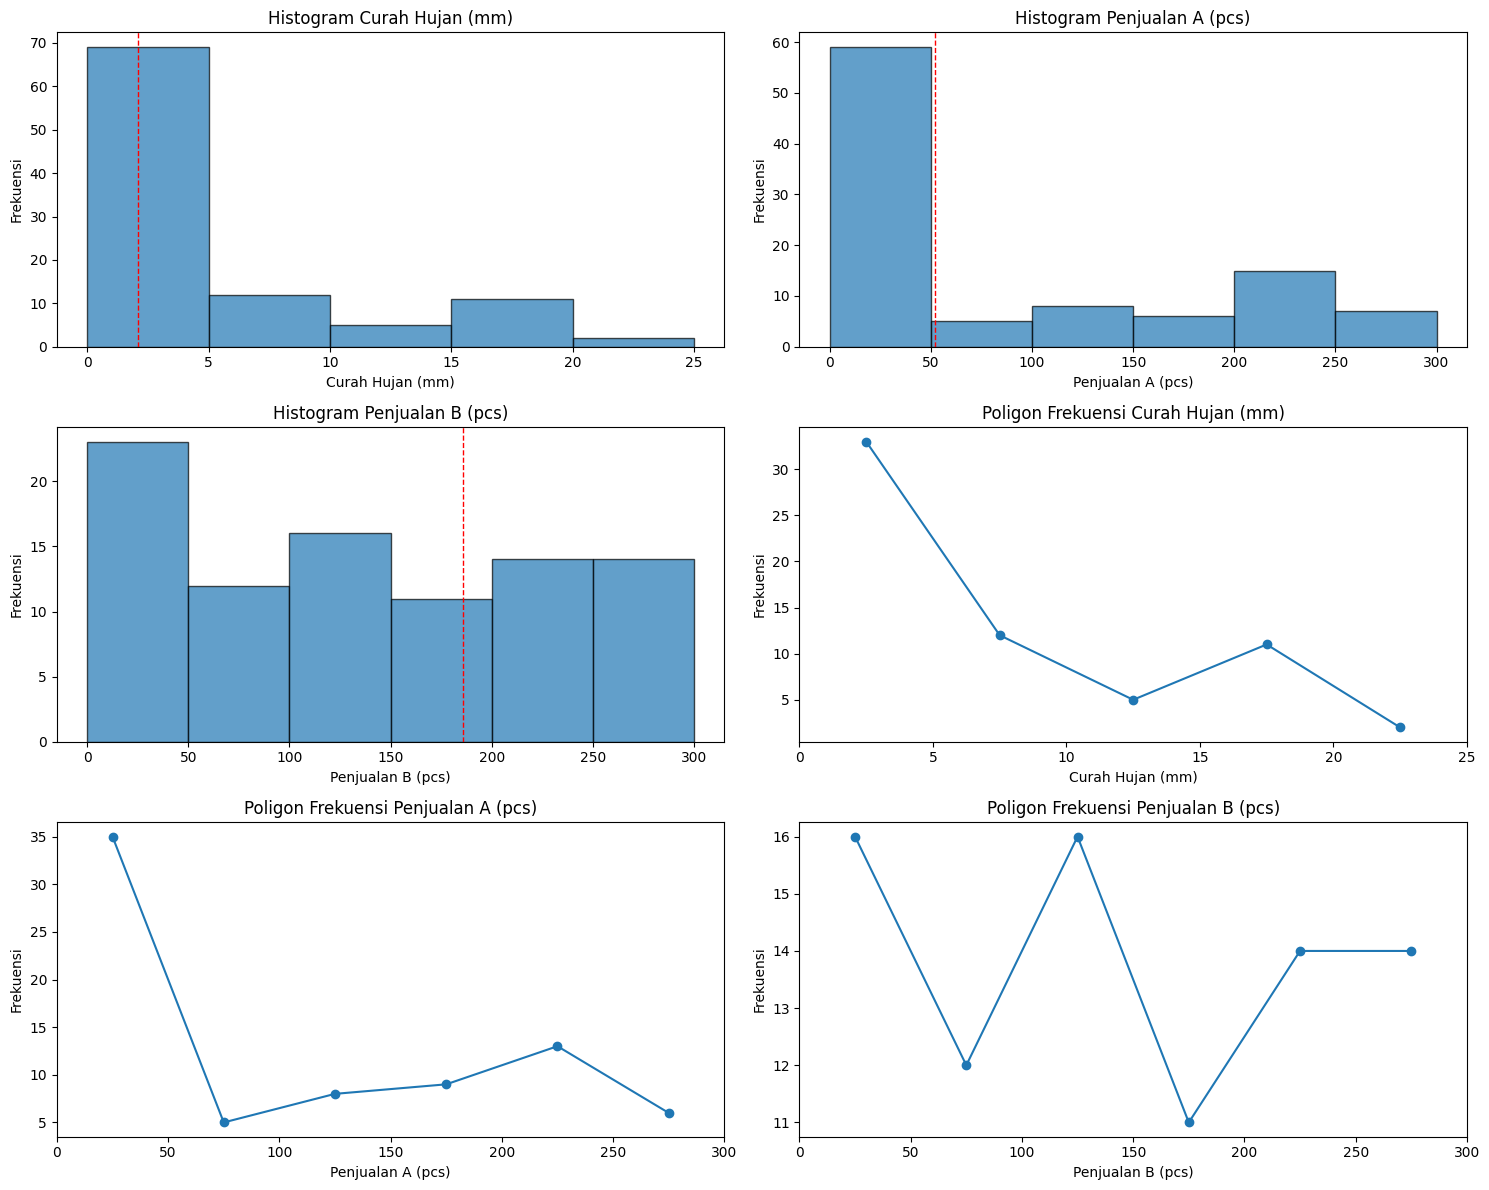

In [98]:
# Fungsi untuk membuat tabel distribusi frekuensi
def frequency_distribution(column, bins):
    freq_table = pd.cut(column, bins=bins, right=True).value_counts().sort_index()
    return freq_table

# Mengatur ukuran plot
plt.figure(figsize=(15, 12))

# Mendefinisikan bin interval untuk histogram
bins_hujan = [0, 5, 10, 15, 20, 25]  # Untuk Curah Hujan
bins_penjualan = [0, 50, 100, 150, 200, 250, 300]  # Untuk Penjualan A dan B

# Mengulangi untuk setiap kolom, kecuali 'Tanggal'
for i, column in enumerate(data.columns[1:], start=1):  # Mulai dari index 1 untuk mengabaikan 'Tanggal'
    # Menghitung distribusi frekuensi
    if 'Hujan' in column:
        frekuensi = frequency_distribution(data[column], bins_hujan)
        bins = bins_hujan
    else:
        frekuensi = frequency_distribution(data[column], bins_penjualan)
        bins = bins_penjualan

    # Menampilkan Tabel Distribusi Frekuensi
    # print(f"Tabel Distribusi Frekuensi {column}:")
    # print(frekuensi)
    # print()

    # Membuat subplot untuk histogram dan poligon frekuensi
    plt.subplot(3, 2, i)
    
    # Histogram
    plt.hist(data[column], bins=bins, edgecolor='black', alpha=0.7)
    plt.axvline(data[column].median(), color='red', linestyle='dashed', linewidth=1)
    plt.title(f'Histogram {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.xticks(bins)

    # Poligon Frekuensi
    plt.subplot(3, 2, i + 3)
    mid_bins = [(bins[j] + bins[j + 1]) / 2 for j in range(len(bins) - 1)]
    plt.plot(mid_bins, frekuensi.sort_index(), marker='o', linestyle='-')
    plt.title(f'Poligon Frekuensi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.xticks(bins)

# Menampilkan semua plot
plt.tight_layout()
plt.show()

### 3. Ukuran Persebaran Data (Range, InterQuartile Range (IQR), Variansi, Standar Deviasi, Skewness, Kurtosis)

#### Penjelasan

##### 1. Range
**Range** adalah selisih antara nilai maksimum dan nilai minimum dalam suatu dataset. Range memberikan gambaran umum tentang sebaran data, tetapi tidak memberikan informasi tentang distribusi data di dalam rentang tersebut. Rumusnya adalah:
$$
\text{Range} = \text{Nilai Maksimum} - \text{Nilai Minimum}
$$

##### 2. InterQuartile Range (IQR)
**InterQuartile Range (IQR)** adalah ukuran sebaran data yang mengukur rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3). IQR memberikan gambaran tentang rentang nilai yang berada di tengah 50% data, sehingga lebih tahan terhadap pengaruh outlier. Rumusnya adalah:
$$
\text{IQR} = Q3 - Q1
$$

##### 3. Variansi
**Variansi** adalah ukuran yang menunjukkan seberapa jauh setiap nilai dalam dataset tersebar dari rata-rata (mean). Variansi dihitung dengan menghitung rata-rata kuadrat selisih antara setiap nilai dan rata-rata. Variansi tinggi menunjukkan bahwa nilai-nilai dalam dataset jauh dari rata-rata, sementara variansi rendah menunjukkan bahwa nilai-nilai lebih dekat dengan rata-rata. Rumusnya adalah:
$$
\text{Variansi} (\sigma^2) = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$
di mana $N$ adalah jumlah data, $x_i$ adalah nilai data, dan $\mu$ adalah rata-rata.

##### 4. Standar Deviasi
**Standar Deviasi** adalah akar kuadrat dari variansi dan memberikan ukuran sebaran data dalam satuan yang sama dengan data itu sendiri. Standar deviasi yang lebih rendah menunjukkan bahwa nilai-nilai cenderung lebih dekat dengan rata-rata, sedangkan standar deviasi yang lebih tinggi menunjukkan bahwa nilai-nilai lebih tersebar. Rumusnya adalah:
$$
\text{Standar Deviasi} (\sigma) = \sqrt{\text{Variansi}}
$$

##### 5. Skewness
**Skewness** adalah ukuran asimetri distribusi data. Ini menunjukkan apakah data lebih banyak terdistribusi ke satu sisi dari rata-rata. 
- **Skewness positif**:
    - Distribusi memiliki lebih banyak nilai kecil dan beberapa nilai yang sangat besar.
    - Ini bisa menunjukkan bahwa sebagian besar data terpusat di sisi kiri, sementara beberapa nilai ekstrem menyebabkan rata-rata lebih tinggi daripada median.
    
- **Skewness negatif** :
    - Hal ini berarti bahwa sebagian besar nilai berada di sisi kanan dari distribusi, sedangkan ada beberapa nilai ekstrem yang berada jauh di sisi kiri.
    
- **Skewness nol** menunjukkan bahwa distribusi simetris.

##### 6. Kurtosis
**Kurtosis** adalah ukuran yang menggambarkan "ketinggian" dan "lebar" distribusi data. Ini menunjukkan seberapa tajam atau datar puncak distribusi dibandingkan dengan distribusi normal.
- **Kurtosis tinggi** menunjukkan puncak yang tajam dan ekor yang panjang (data cenderung berkelompok di sekitar mean).
- **Kurtosis rendah** menunjukkan puncak yang lebih datar dan ekor yang lebih pendek (data cenderung lebih tersebar).
- **Kurtosis nol** menunjukkan distribusi normal.



In [92]:
# Dictionary untuk menyimpan hasil
spread_results = {}

# Menghitung ukuran persebaran data
for column in data.columns[1:]:  # Mengabaikan kolom 'Tanggal'
    # Range
    data_range = data[column].max() - data[column].min()
    
    # Interquartile Range (IQR)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    # Skewness dan Kurtosis
    skewness = data[column].skew()  
    kurt = stats.kurtosis(data[column])  

    # Variansi
    variance = data[column].var()
    
    # Standar Deviasi
    std_dev = data[column].std()
    
    # Menyimpan hasil dalam dictionary
    spread_results[column] = {
        'Range': data_range,
        'IQR': iqr,
        'Variansi': variance,
        'Standar Deviasi': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurt

    }

# Mengonversi hasil ke DataFrame untuk tampilan yang lebih baik
df_spread_results = pd.DataFrame(spread_results).T # transpose
df_spread_results


,Range,IQR,Variansi,Standar Deviasi,Skewness,Kurtosis
Curah Hujan (mm),170.6,16.4,758.465596,27.540254,3.635598,15.849394
Penjualan A (pcs),458.0,233.0,20049.672452,141.596866,0.708652,-0.870290
Penjualan B (pcs),523.0,226.0,20970.872452,144.813233,0.310296,-0.951990


In [93]:
## Gabungkan hasil perhitungan ukuran pemusatan data dan ukuran penyebaran data
df_combined = pd.concat([df_transpose_results, df_spread_results], axis=1)

# Menampilkan hasil gabungan
df_combined

,mean,median,mode,Q1,Q3,Range,IQR,Variansi,Standar Deviasi,Skewness,Kurtosis
Curah Hujan (mm),14.259504,2.1,0.0,0.0,16.4,170.6,16.4,758.465596,27.540254,3.635598,15.849394
Penjualan A (pcs),131.834711,52.0,0.0,5.0,238.0,458.0,233.0,20049.672452,141.596866,0.708652,-0.870290
Penjualan B (pcs),201.165289,186.0,0.0,76.0,302.0,523.0,226.0,20970.872452,144.813233,0.310296,-0.951990


### 4. Deteksi Outliers

##### Apa itu Outlier?

**Outlier** adalah nilai-nilai yang berada di luar rentang nilai normal atau yang diharapkan. Nilai ini dapat dianggap sebagai data yang tidak biasa, ekstrem, atau tidak sesuai dengan pola yang umum dalam dataset.


In [94]:

# Menghitung batas bawah dan batas atas outliers
lower_bounds = df_combined['Q1'] - 1.5 * df_combined['IQR']
upper_bounds = df_combined['Q3'] + 1.5 * df_combined['IQR']

# outliers
outliers = {
    'Curah Hujan (mm)': data[(data['Curah Hujan (mm)'] < lower_bounds['Curah Hujan (mm)']) | (data['Curah Hujan (mm)'] > upper_bounds['Curah Hujan (mm)'])],
    'Penjualan A (pcs)': data[(data['Penjualan A (pcs)'] < lower_bounds['Penjualan A (pcs)']) | (data['Penjualan A (pcs)'] > upper_bounds['Penjualan A (pcs)'])],
    'Penjualan B (pcs)': data[(data['Penjualan B (pcs)'] < lower_bounds['Penjualan B (pcs)']) | (data['Penjualan B (pcs)'] > upper_bounds['Penjualan B (pcs)'])]
}

# Menampilkan jumlah outliers
for key, value in outliers.items():
    print(f"\nJumlah Outliers untuk {key}: {value.shape[0]}")


Jumlah Outliers untuk Curah Hujan (mm): 13

Jumlah Outliers untuk Penjualan A (pcs): 0

Jumlah Outliers untuk Penjualan B (pcs): 0


#### Visualisasi Data Menggunakan Boxplot

##### Apa itu Boxplot?

Boxplot adalah sebuah alat visualisasi yang digunakan untuk menggambarkan distribusi suatu dataset dengan cara menunjukkan ringkasan statistiknya.

##### Fungsi Boxplot

1. **Mendeteksi Outlier** :
    Boxplot sangat efektif dalam mengidentifikasi outlier dalam data. Titik-titik di luar whiskers boxplot menunjukkan nilai yang dianggap outlier.

2. **Ringkasan Statistika** : 
    Boxplot memberikan gambaran ringkas dari distribusi data, termasuk:
    
    - Minimum: Nilai terendah dalam data (tanpa outlier).

    - Q1 (Kuartil Pertama): 25% dari data berada di bawah nilai ini.

    - Median (Q2): Nilai tengah dari data, di mana 50% data berada di bawah dan di atasnya.

    - Q3 (Kuartil Ketiga): 75% dari data berada di bawah nilai ini.
        
    - Maksimum: Nilai tertinggi dalam data (tanpa outlier).

 - **Sebelum Outliers Dibersihkan**

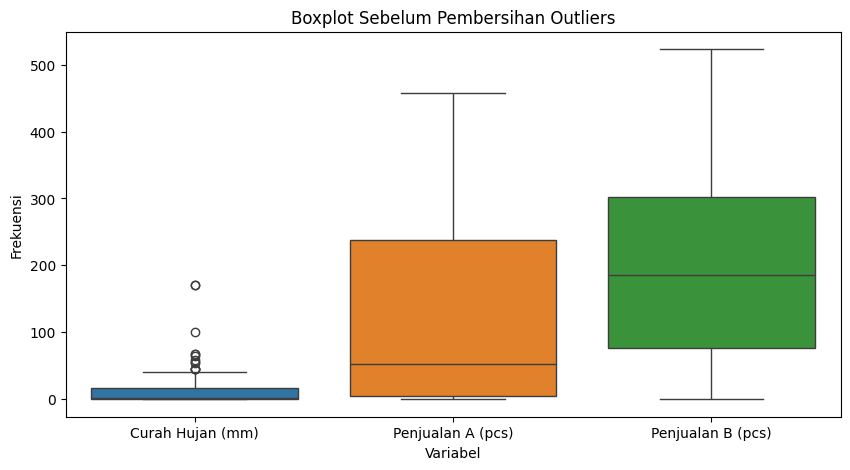

In [95]:
# Membuat boxplot sebelum membersihkan outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data.drop('Tanggal', axis=1))
plt.title('Boxplot Sebelum Pembersihan Outliers')
plt.ylabel('Frekuensi')
plt.xlabel('Variabel')
plt.show()

Dapat dilihat bahwa pada boxplot kolom `Curah Hujan (mm)` terdapat '*titik - titik*' diatas batas atas, itu adalah outliers dari  kolom `Curah Hujan (mm)`. Pada kolom lainnya tidak terlihat adanya '*titik - titik*', jadi pada kolom lainnya **tidak ada** outliers

Mari kita bersihkan outliers nya dan lihat apa yang terjadi pada boxplot kolom `Curah Hujan (mm)`

In [96]:
# Fungsi untuk menghilangkan outliers berdasarkan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Fungsi untuk membuat boxplot perbandingan
def create_comparison_boxplot(column):
    plt.figure(figsize=(12, 6))
    
    # Membuat DataFrame untuk plot
    plot_data = pd.DataFrame({
        'Dataset': ['Sebelum di Bersihkan'] * len(data) + ['Setelah di Bersihkan'] * len(data_cleaned),
        column: pd.concat([data[column], data_cleaned[column]])
    })
    
    # Membuat boxplot
    sns.boxplot(x='Dataset', y=column, data=plot_data)
    
    plt.title(f'Boxplot Comparison for {column}')
    plt.ylabel(column)
    plt.show()

# Buat data_cleaned dengan menghilangkan outliers
data_cleaned = data.copy()
for col in data_cleaned.columns:
    data_cleaned = remove_outliers(data_cleaned, col)

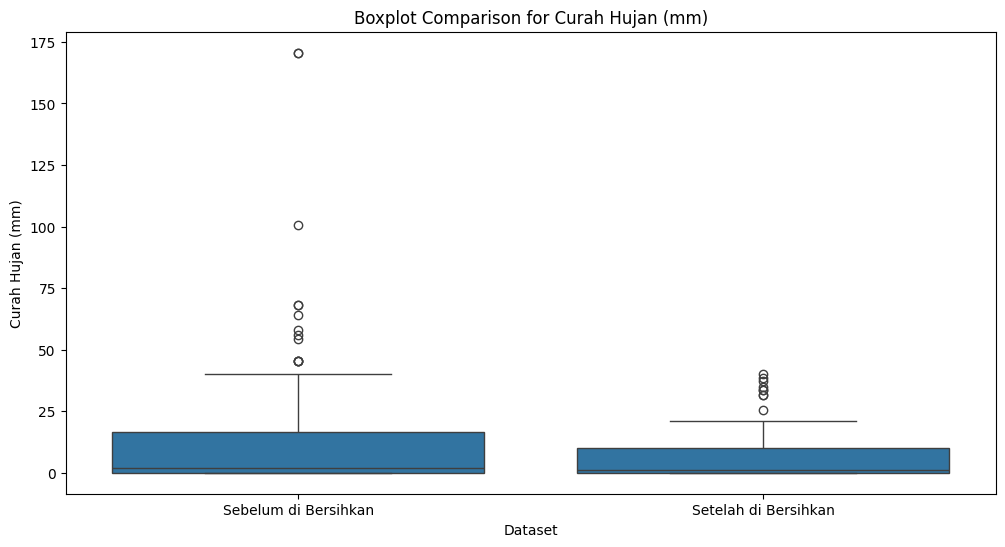

In [97]:
create_comparison_boxplot('Curah Hujan (mm)')

# Buat boxplot perbandingan untuk setiap kolom numerik
# for col in data.columns:
#     if col != 'Tanggal':
#         create_comparison_boxplot(col)

Dapat dilihat bahwa ada perubahan **sebelum** dan **sesudah** outliers pada kolom `Curah Hujan (mm)` dibersihkan.

Pada versi yang sudah dibersihkan *titik - titik* nya tidak sampai 41 (upper bounds), yang mana kolom tersebut sudah tidak ada lagi outliers.

### Kesimpulan

#### Analisis Data

Berdasarkan analisis deskriptif yang dilakukan terhadap data Curah Hujan, Penjualan A, dan Penjualan B, berikut adalah interpretasi hasil analisis:

1. **Persebaran Data**:
   - Data Curah Hujan menunjukkan rentang yang cukup luas, dengan nilai-nilai yang terdistribusi lebih banyak pada bagian bawah skala, sementara beberapa nilai ekstrem terdapat di bagian atas.
   - Penjualan A memiliki sebaran yang menunjukkan bahwa sebagian besar penjualan berada pada angka yang rendah, meskipun terdapat beberapa nilai yang jauh lebih tinggi.
   - Penjualan B memperlihatkan sebaran yang lebih stabil dan lebih tinggi dibandingkan dengan Penjualan A, dengan nilai median yang lebih tinggi, menunjukkan performa penjualan yang lebih baik.

2. **Ada Tidaknya Outlier**:
   - Terdapat beberapa outlier yang terdeteksi dalam variabel yang dianalisis. 
   - Curah Hujan memiliki outliers karena memiliki beberapa nilai ekstrem yang mungkin dipengaruhi oleh fenomena cuaca tertentu. 
   - Penjualan A dan B tidak ditemukan outliers.

3. **Bentuk Distribusi**:
   - Semua distribusi data cenderung miring ke kiri, menunjukkan bahwa sebagian besar data terfokus pada nilai rendah dengan beberapa nilai ekstrem di sisi kanan.
   

